In [126]:
import pandas as pd
from pathlib import Path
import datetime

path = Path.cwd()
path = str(path)+'/GFMS DB/'
path

'/Users/keumhyeonjun/Projects/행안부/자재/GFMS DB/'

# 데이터 불러오기

In [127]:
FMSA10_작업지시_결과 = pd.read_csv(path+'FMSA10_작업지시_결과_ver2.csv')

FMSA11_작업장비이력 = pd.read_excel(path + 'FMSA11_작업장비이력.xlsx')

FMSX05_장비마스터 = pd.read_csv(path + 'FMSX05_장비마스터_ver2.csv')

FMSB07_자재출고 = pd.read_excel(path + 'FMSB07_자재출고.xlsx')

FMSB03_자재마스터 = pd.read_csv(path + 'FMSB03_자재마스터_ver2.csv')

FMSB03_자재마스터.drop(['class_nm_4','class_cd_4'],axis =1,inplace = True)

FMSB03_자재마스터.rename(columns={'class_nm_3':'jajae_class_nm_3'},inplace = True)
FMSB03_자재마스터.rename(columns={'class_nm_2':'jajae_class_nm_2'},inplace = True)
FMSB03_자재마스터.rename(columns={'class_nm_1':'jajae_class_nm_1'},inplace = True)

FMSB03_자재마스터.rename(columns={'class_cd_3':'jajae_class_cd_3'},inplace = True)
FMSB03_자재마스터.rename(columns={'class_cd_2':'jajae_class_cd_2'},inplace = True)
FMSB03_자재마스터.rename(columns={'class_cd_1':'jajae_class_cd_1'},inplace = True)


FMSX05_장비마스터.rename(columns={'class_nm_4':'jangbi_class_nm_4'},inplace = True)
FMSX05_장비마스터.rename(columns={'class_nm_3':'jangbi_class_nm_3'},inplace = True)
FMSX05_장비마스터.rename(columns={'class_nm_2':'jangbi_class_nm_2'},inplace = True)
FMSX05_장비마스터.rename(columns={'class_nm_1':'jangbi_class_nm_1'},inplace = True)


FMSX05_장비마스터.rename(columns={'class_cd_4':'jangbi_class_cd_4'},inplace = True)
FMSX05_장비마스터.rename(columns={'class_cd_3':'jangbi_class_cd_3'},inplace = True)
FMSX05_장비마스터.rename(columns={'class_cd_2':'jangbi_class_cd_2'},inplace = True)
FMSX05_장비마스터.rename(columns={'class_cd_1':'jangbi_class_cd_1'},inplace = True)

FMSA10_작업지시_결과.rename(columns={'class_nm_4':'job_class_nm_4'},inplace = True)
FMSA10_작업지시_결과.rename(columns={'class_nm_3':'job_class_nm_3'},inplace = True)
FMSA10_작업지시_결과.rename(columns={'class_nm_2':'job_class_nm_2'},inplace = True)
FMSA10_작업지시_결과.rename(columns={'class_nm_1':'job_class_nm_1'},inplace = True)


FMSA10_작업지시_결과.rename(columns={'class_cd_4':'job_class_cd_4'},inplace = True)
FMSA10_작업지시_결과.rename(columns={'class_cd_3':'job_class_cd_3'},inplace = True)
FMSA10_작업지시_결과.rename(columns={'class_cd_2':'job_class_cd_2'},inplace = True)
FMSA10_작업지시_결과.rename(columns={'class_cd_1':'job_class_cd_1'},inplace = True)

fmsa10 =FMSA10_작업지시_결과[['job_cd','job_nm','job_jisi_dt','job_enddt','job_shm','job_ehm','job_class_nm_1','job_class_nm_2','job_class_nm_3','job_class_nm_4']]
fmsb03 = FMSB03_자재마스터[['mat_cd','mat_nm','jajae_class_nm_1','jajae_class_nm_2','jajae_class_nm_3','jajae_class_cd_3']]
fmsx05 = FMSX05_장비마스터[['fac_cd','fac_nm','jangbi_class_nm_1','jangbi_class_nm_2','jangbi_class_nm_3','jangbi_class_nm_4','fac_instdt']]


FMSB07_자재출고["mat_cd"] = FMSB07_자재출고["mat_cd"].astype("str")
FMSB07_자재출고["mat_cd"] = list(map(lambda x: x[:-3],FMSB07_자재출고["mat_cd"].tolist())) # FMSB03과 inner join하기 위해 mat_cd 형식 일치
fmsb03["mat_cd"] = fmsb03["mat_cd"].astype("str")
jajae = pd.merge(FMSB07_자재출고,fmsb03 ,on = 'mat_cd', how = 'inner')
jajae = jajae[['job_cd','outw_day','mat_cd','outw_qty','mat_nm_x','jajae_class_nm_1','jajae_class_nm_2','jajae_class_nm_3','jajae_class_cd_3']]


jangbi = pd.merge(FMSA11_작업장비이력, fmsx05, how='inner', on='fac_cd')
jangbi_broken = pd.merge(fmsa10,jangbi, on='job_cd',how = 'inner')

jangbi_broken.drop(['job_cont','chg_sysdt','chg_emp_no'],axis=1,inplace=True)
jangbi_broken = jangbi_broken.dropna()

jangbi_broken['자재매칭여부'] = jangbi_broken['job_cd']
arr_장비 = list(jangbi_broken['job_cd'])
arr_자재 = list(jajae['job_cd'])
#자재 매칭이 안되는 경우
arr = list(set(arr_장비)- set(arr_자재))

def function(x):
    if x in arr:
        return 0
    else:
         return 1

jangbi_broken['자재매칭여부'] = jangbi_broken['자재매칭여부'].apply(function)
df = pd.merge(jangbi_broken,jajae, on='job_cd',how = 'inner')

final = df[['job_cd','job_nm','job_jisi_dt','job_enddt','job_shm','job_ehm','job_class_nm_1','job_class_nm_2','job_class_nm_3','job_class_nm_4','fac_cd','fac_nm','fac_instdt','mat_cd','mat_nm_x',
           'jangbi_class_nm_1','jangbi_class_nm_2','jangbi_class_nm_3','jangbi_class_nm_4','자재매칭여부','mat_nm_x','jajae_class_nm_1','jajae_class_nm_2','jajae_class_nm_3','jajae_class_cd_3']]

/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_28133/3766325795.py:1: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  FMSA10_작업지시_결과 = pd.read_csv(path+'FMSA10_작업지시_결과_ver2.csv')
/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_28133/3766325795.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fmsb03["mat_cd"] = fmsb03["mat_cd"].astype("str")


In [128]:
jangbi_broken

jangbi_broken = jangbi_broken.sort_values('job_jisi_dt')


jangbi_broken['기준일자'] = '2022-10-11'

jangbi_broken['기준일자'] = pd.to_datetime(jangbi_broken['기준일자'])
jangbi_broken['fac_instdt'] = pd.to_datetime(jangbi_broken['fac_instdt'])
jangbi_broken['job_jisi_dt'] = pd.to_datetime(jangbi_broken['job_jisi_dt'])


jangbi_broken['설치-작업간격'] = jangbi_broken['job_jisi_dt'] - jangbi_broken['fac_instdt']

def slicing(x):
    return x[:-4]
jangbi_broken['설치-작업간격'] = jangbi_broken['설치-작업간격'].astype(str)
jangbi_broken['설치-작업간격'] = jangbi_broken['설치-작업간격'].apply(slicing)
jangbi_broken['설치-작업간격'] = jangbi_broken['설치-작업간격'].astype(int)

jangbi_broken['작업-작업간격'] = 0
jangbi_broken = jangbi_broken.sort_values(['fac_cd','설치-작업간격'])
jangbi_broken.head()

,job_cd,job_nm,job_jisi_dt,job_enddt,job_shm,job_ehm,job_class_nm_1,job_class_nm_2,job_class_nm_3,job_class_nm_4,...,fac_nm,jangbi_class_nm_1,jangbi_class_nm_2,jangbi_class_nm_3,jangbi_class_nm_4,fac_instdt,자재매칭여부,기준일자,설치-작업간격,작업-작업간격
3985,220506-00021,16동 흡수식 냉동기 세관 작업,2022-05-06,2022-05-06,2022-05-06 오전 9:00:00,2022-05-06 오후 3:00:00,16동,지하2층,열원설비,냉동기,...,흡수식냉동기#1,기계,공기조화설비,열원설비,냉동기,2019-09-03,0,2022-10-11,976,0
4006,220509-00008,16동 흡수식 냉동기 세관 작업,2022-05-09,2022-05-09,2022-05-09 오전 9:00:00,2022-05-09 오전 9:30:00,16동,지하2층,열원설비,냉동기,...,흡수식냉동기#1,기계,공기조화설비,열원설비,냉동기,2019-09-03,1,2022-10-11,979,0
4102,220513-00042,16동 냉동기 시운전 보고서,2022-05-13,2022-05-13,2022-05-13 오후 1:00:00,2022-05-13 오후 3:00:00,16동,지하2층,열원설비,냉동기,...,흡수식냉동기#1,기계,공기조화설비,열원설비,냉동기,2019-09-03,0,2022-10-11,983,0
5582,220809-00058,16동 지하2층 기계실 흡수식냉동기#1 추기작업,2022-08-09,2022-08-09,2022-08-09 오후 3:00:00,2022-08-09 오후 4:00:00,16동,지하2층,열원설비,냉동기,...,흡수식냉동기#1,기계,공기조화설비,열원설비,냉동기,2019-09-03,0,2022-10-11,1071,0
3986,220506-00021,16동 흡수식 냉동기 세관 작업,2022-05-06,2022-05-06,2022-05-06 오전 9:00:00,2022-05-06 오후 3:00:00,16동,지하2층,열원설비,냉동기,...,흡수식냉동기#2,기계,공기조화설비,열원설비,냉동기,2014-02-01,0,2022-10-11,3016,0


In [129]:
for i in range(len(jangbi_broken)):
    if i == 0:
        jangbi_broken['작업-작업간격'].iloc[i] = jangbi_broken['설치-작업간격'].iloc[i]
    else :
        now_data = jangbi_broken['fac_cd'].iloc[i]
        past_data = jangbi_broken['fac_cd'].iloc[i-1]
        if now_data == past_data:
            jangbi_broken['작업-작업간격'].iloc[i] = jangbi_broken['설치-작업간격'].iloc[i] - jangbi_broken['설치-작업간격'].iloc[i-1]
        else :
            jangbi_broken['작업-작업간격'].iloc[i] = jangbi_broken['설치-작업간격'].iloc[i]
jangbi_broken.head()

/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_28133/3332997703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jangbi_broken['작업-작업간격'].iloc[i] = jangbi_broken['설치-작업간격'].iloc[i]
/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_28133/3332997703.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jangbi_broken['작업-작업간격'].iloc[i] = jangbi_broken['설치-작업간격'].iloc[i] - jangbi_broken['설치-작업간격'].iloc[i-1]
/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_28133/3332997703.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the

,job_cd,job_nm,job_jisi_dt,job_enddt,job_shm,job_ehm,job_class_nm_1,job_class_nm_2,job_class_nm_3,job_class_nm_4,...,fac_nm,jangbi_class_nm_1,jangbi_class_nm_2,jangbi_class_nm_3,jangbi_class_nm_4,fac_instdt,자재매칭여부,기준일자,설치-작업간격,작업-작업간격
3985,220506-00021,16동 흡수식 냉동기 세관 작업,2022-05-06,2022-05-06,2022-05-06 오전 9:00:00,2022-05-06 오후 3:00:00,16동,지하2층,열원설비,냉동기,...,흡수식냉동기#1,기계,공기조화설비,열원설비,냉동기,2019-09-03,0,2022-10-11,976,976
4006,220509-00008,16동 흡수식 냉동기 세관 작업,2022-05-09,2022-05-09,2022-05-09 오전 9:00:00,2022-05-09 오전 9:30:00,16동,지하2층,열원설비,냉동기,...,흡수식냉동기#1,기계,공기조화설비,열원설비,냉동기,2019-09-03,1,2022-10-11,979,3
4102,220513-00042,16동 냉동기 시운전 보고서,2022-05-13,2022-05-13,2022-05-13 오후 1:00:00,2022-05-13 오후 3:00:00,16동,지하2층,열원설비,냉동기,...,흡수식냉동기#1,기계,공기조화설비,열원설비,냉동기,2019-09-03,0,2022-10-11,983,4
5582,220809-00058,16동 지하2층 기계실 흡수식냉동기#1 추기작업,2022-08-09,2022-08-09,2022-08-09 오후 3:00:00,2022-08-09 오후 4:00:00,16동,지하2층,열원설비,냉동기,...,흡수식냉동기#1,기계,공기조화설비,열원설비,냉동기,2019-09-03,0,2022-10-11,1071,88
3986,220506-00021,16동 흡수식 냉동기 세관 작업,2022-05-06,2022-05-06,2022-05-06 오전 9:00:00,2022-05-06 오후 3:00:00,16동,지하2층,열원설비,냉동기,...,흡수식냉동기#2,기계,공기조화설비,열원설비,냉동기,2014-02-01,0,2022-10-11,3016,3016


In [130]:
max_time = datetime.datetime(2022,10,11)
analysis_data = pd.merge(fmsx05,jangbi_broken[['fac_cd','작업-작업간격','job_cd','job_nm']], on ='fac_cd', how ='left')

analysis_data['fac_instdt'] = pd.to_datetime(analysis_data['fac_instdt'])

analysis_data = analysis_data[analysis_data['fac_instdt'] <= max_time]


analysis_data['max_time'] = max_time
analysis_data['max_time'] = pd.to_datetime(analysis_data['max_time'])
analysis_data['작업-작업간격'] = analysis_data['작업-작업간격'].fillna(999999)

#analysis_data.dropna(inplace = True)
def status(df):
    if df['작업-작업간격'] == 999999:
        return 0
    else :
        return 1

analysis_data['status'] =analysis_data.apply(status,axis=1)



def time(df):
    x = df['작업-작업간격']
    if x == 999999:
        return int(str(df['max_time'] -  df['fac_instdt'])[:-13])
    else :
        return int(x)
analysis_data['작업-작업간격'] = analysis_data.apply(time,axis=1)
analysis_data.head()

,fac_cd,fac_nm,jangbi_class_nm_1,jangbi_class_nm_2,jangbi_class_nm_3,jangbi_class_nm_4,fac_instdt,작업-작업간격,job_cd,job_nm,max_time,status
0,200201040293,(3)세-1F-0(여)로비-화장실) 세면대 2대,기계,"위생, 탱크설비",위생설비,세면대 수전,2018-03-05,1681,NaN,NaN,2022-10-11,0
1,200201010257,9F여1대변기(5),기계,"위생, 탱크설비",위생설비,대변기,2014-06-01,3054,NaN,NaN,2022-10-11,0
2,200202030001,우수조#1,기계,"위생, 탱크설비",탱크설비,우수 저장조,2019-10-22,1085,NaN,NaN,2022-10-11,0
3,200105080599,배기휀#76(EF-504),기계,공기조화설비,환기설비,환기팬,2019-10-23,1084,NaN,NaN,2022-10-11,0
4,200202010001,시수조#1,기계,"위생, 탱크설비",탱크설비,상수 저장조,2019-10-22,1085,NaN,NaN,2022-10-11,0


# 기간 내 고장 확률 산출

In [131]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

Text(0.5, 1.0, '소변기 기간별 정상 확률')

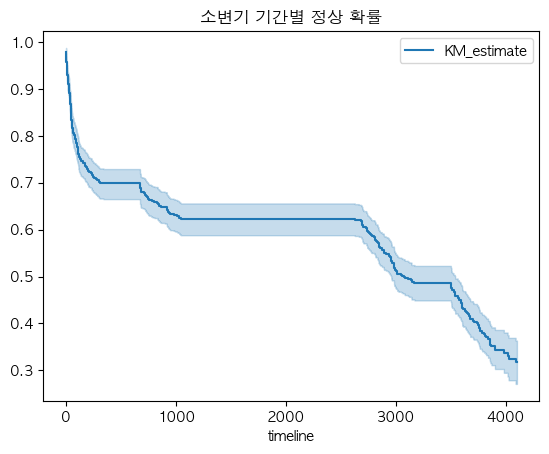

In [132]:
장비명 = '소변기'
input_data = analysis_data[analysis_data['jangbi_class_nm_4']==장비명]


kmf = KaplanMeierFitter()
input_data.sort_values(by='작업-작업간격', ascending=True)
kmf.fit(durations=input_data['작업-작업간격'], event_observed=input_data['status'])
kmf.plot_survival_function()
plt.title(장비명+' 기간별 정상 확률')


In [133]:
기간_일 = 30
print(f'{장비명} {기간_일}일 안에 고장날 확률 = {(1- kmf.predict(기간_일)).round(3)}')

소변기 30일 안에 고장날 확률 = 0.108


In [134]:
FMSX05_장비마스터

,Unnamed: 0,comp_cd,fac_cd,fac_nm,class_cd,dept_cd,fac_model,fac_spec,fac_plc,bd_cd,...,chk_edit_dt,law_fac_yn,jangbi_class_nm_1,jangbi_class_nm_2,jangbi_class_nm_3,jangbi_class_nm_4,jangbi_class_cd_1,jangbi_class_cd_2,jangbi_class_cd_3,jangbi_class_cd_4
0,0,SEJO,200201040293,(3)세-1F-0(여)로비-화장실) 세면대 2대,20020104,10201,자동(2)/수동(0),청소수전,(여)로비,NaN,...,NaN,N,기계,"위생, 탱크설비",위생설비,세면대 수전,20,2002,200201,20020104
1,1,SEJO,200201010257,9F여1대변기(5),20020101,10201,CC-113(바닥형),690*395*435,여-1(동) 화장실,NaN,...,NaN,N,기계,"위생, 탱크설비",위생설비,대변기,20,2002,200201,20020101
2,2,SEJO,200202030001,우수조#1,20020203,10201,NaN,NaN,NaN,NaN,...,NaN,N,기계,"위생, 탱크설비",탱크설비,우수 저장조,20,2002,200202,20020203
3,3,SEJO,200105080599,배기휀#76(EF-504),20010508,10201,NaN,NaN,NaN,NaN,...,NaN,N,기계,공기조화설비,환기설비,환기팬,20,2001,200105,20010508
4,4,SEJO,200202010001,시수조#1,20020201,10201,NaN,NaN,NaN,NaN,...,NaN,N,기계,"위생, 탱크설비",탱크설비,상수 저장조,20,2002,200202,20020201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40806,40806,SEJO,700101020004,SCC 4호기 권상기,70010102,10302,HS250K,12*6,NaN,SJ-SCJS-01,...,NaN,N,승강기,승객용,MR,권상기,70,7001,700101,70010102
40807,40807,SEJO,700101020005,SCC 5호기 권상기,70010102,10302,HS250K,12*6,NaN,SJ-SCJS-01,...,NaN,N,승강기,승객용,MR,권상기,70,7001,700101,70010102
40808,40808,SEJO,700101020006,SCC 6호기 권상기,70010102,10302,HS250K,12*6,NaN,SJ-SCJS-01,...,NaN,N,승강기,승객용,MR,권상기,70,7001,700101,70010102
40809,40809,SEJO,700201010010,SCC 7호기 제어반,70020101,10302,DZDLE-4300,NaN,NaN,SJ-SCJS-01,...,NaN,N,승강기,화물용,로프식,제어반,70,7002,700201,70020101
